In [24]:
import frontiers_yildizetal as fy
from frontiers_yildizetal.scalar_emulators2 import *
import pkg_resources
import pandas as pd
import numpy as np
from scipy.stats import skew

In [3]:
pem = Simulations('simple_pem')
pem_scalar = pem.curate_scalars(threshold=0.1, loc_x=1000, loc_y=2000)

Calculating IA...
IA calculated.
Calculating DA...
DA calculated.
Calculating DV...
DV calculated.
Extracting QoI: vmax... 
QoI: vmax extracted.
Extracting QoI: hmax... 
QoI: hmax extracted.


In [4]:
simple = ScalarEmulators('simple', h_threshold=0.1, loc_x=1000, loc_y=2000)

Calculating IA...
IA calculated.
Calculating DA...
DA calculated.
Calculating DV...
DV calculated.
Extracting QoI: vmax... 
QoI: vmax extracted.
Extracting QoI: hmax... 
QoI: hmax extracted.


In [50]:
scalars = list(pem_scalar.columns)
mcs_analysis = ['mcs1','mcs2','mcs3']
pem_analysis = ['pem1','pem2','pem3']
funcs = [np.mean, np.var, skew]
f_names = ['mean','var','skew']

In [56]:
mcs_moments = {}
for i in scalars:
    for j in mcs_analysis:
        path = 'files/input/input_' + j + '_simple.csv'
        filepath = pkg_resources.resource_filename('frontiers_yildizetal', path)
        input = pd.read_csv(filepath).to_numpy()
        
        predicted = simple.predict_scalar(i, input)[0]
        for k, f in enumerate(funcs):
            naming = j + '_' + i + '_' + f_names[k]
            mcs_moments[naming] = round(f(predicted),3)

The upper bounds of the range parameters are 8.621307 64491.08 44.41758 
The initial values of range parameters are 0.1724261 1289.822 0.8883516 
Start of the optimization  1  : 
The number of iterations is  15 
 The value of the  marginal posterior  function is  125.4472 
 Optimized range parameters are 0.2238966 1588.852 2.063857 
 Optimized nugget parameter is 0 
 Convergence:  TRUE 
The initial values of range parameters are 0.07730886 578.3035 0.3983007 
Start of the optimization  2  : 
The number of iterations is  22 
 The value of the  marginal posterior  function is  125.4472 
 Optimized range parameters are 0.2238966 1588.852 2.063857 
 Optimized nugget parameter is 0 
 Convergence:  TRUE 
The upper bounds of the range parameters are 8.621307 64491.08 44.41758 
The initial values of range parameters are 0.1724261 1289.822 0.8883516 
Start of the optimization  1  : 
The number of iterations is  15 
 The value of the  marginal posterior  function is  125.4472 
 Optimized range p

In [57]:
mcs_moments

{'mcs1_ia_mean': 2.346,
 'mcs1_ia_var': 0.011,
 'mcs1_ia_skew': -0.064,
 'mcs2_ia_mean': 2.342,
 'mcs2_ia_var': 0.058,
 'mcs2_ia_skew': 0.074,
 'mcs3_ia_mean': 2.364,
 'mcs3_ia_var': 0.114,
 'mcs3_ia_skew': 0.456,
 'mcs1_da_mean': 1.141,
 'mcs1_da_var': 0.004,
 'mcs1_da_skew': -0.036,
 'mcs2_da_mean': 1.141,
 'mcs2_da_var': 0.021,
 'mcs2_da_skew': -0.134,
 'mcs3_da_mean': 1.177,
 'mcs3_da_var': 0.04,
 'mcs3_da_skew': 0.261,
 'mcs1_dv_mean': 1.367,
 'mcs1_dv_var': 0.02,
 'mcs1_dv_skew': 0.06,
 'mcs2_dv_mean': 1.369,
 'mcs2_dv_var': 0.098,
 'mcs2_dv_skew': 0.025,
 'mcs3_dv_mean': 1.368,
 'mcs3_dv_var': 0.148,
 'mcs3_dv_skew': 0.006,
 'mcs1_vmax_mean': 50.764,
 'mcs1_vmax_var': 2.333,
 'mcs1_vmax_skew': -0.256,
 'mcs2_vmax_mean': 50.012,
 'mcs2_vmax_var': 16.198,
 'mcs2_vmax_skew': -0.529,
 'mcs3_vmax_mean': 48.768,
 'mcs3_vmax_var': 50.742,
 'mcs3_vmax_skew': -0.705,
 'mcs1_hmax_mean': 11.189,
 'mcs1_hmax_var': 0.491,
 'mcs1_hmax_skew': -0.723,
 'mcs2_hmax_mean': 11.046,
 'mcs2_hmax_var'

In [53]:
pem_moments = {}
for i, mcs in enumerate(pem_analysis):
    data = pem_scalar.iloc[8*i:8*(i+1),:]
    for scalar in scalars:
        for j, f in enumerate(funcs):
            naming = mcs + '_' + scalar + '_' + f_names[j]
            pem_moments[naming] = round(f(data[scalar]),3)
        

In [54]:
pem_moments

{'pem1_ia_mean': 2.344,
 'pem1_ia_var': 0.011,
 'pem1_ia_skew': 0.002,
 'pem1_da_mean': 1.134,
 'pem1_da_var': 0.004,
 'pem1_da_skew': -0.033,
 'pem1_dv_mean': 1.371,
 'pem1_dv_var': 0.02,
 'pem1_dv_skew': 0.0,
 'pem1_vmax_mean': 50.529,
 'pem1_vmax_var': 2.441,
 'pem1_vmax_skew': 0.063,
 'pem1_hmax_mean': 11.095,
 'pem1_hmax_var': 0.649,
 'pem1_hmax_skew': 0.03,
 'pem2_ia_mean': 2.335,
 'pem2_ia_var': 0.069,
 'pem2_ia_skew': 0.199,
 'pem2_da_mean': 1.133,
 'pem2_da_var': 0.027,
 'pem2_da_skew': 0.11,
 'pem2_dv_mean': 1.37,
 'pem2_dv_var': 0.126,
 'pem2_dv_skew': 0.0,
 'pem2_vmax_mean': 50.065,
 'pem2_vmax_var': 15.048,
 'pem2_vmax_skew': 0.067,
 'pem2_hmax_mean': 11.049,
 'pem2_hmax_var': 3.026,
 'pem2_hmax_skew': 0.004,
 'pem3_ia_mean': 2.325,
 'pem3_ia_var': 0.296,
 'pem3_ia_skew': 0.445,
 'pem3_da_mean': 1.15,
 'pem3_da_var': 0.112,
 'pem3_da_skew': 0.179,
 'pem3_dv_mean': 1.368,
 'pem3_dv_var': 0.504,
 'pem3_dv_skew': 0.0,
 'pem3_vmax_mean': 47.36,
 'pem3_vmax_var': 66.905,
 'pem3

In [58]:
import matplotlib.pyplot as plt

In [63]:
x = [1,2,3,4,5,6]
y = mcs_moments['mcs1_ia_mean'], pem_moments['pem1_ia_mean'], mcs_moments['mcs2_ia_mean'], pem_moments['pem2_ia_mean'], mcs_moments['mcs3_ia_mean'], pem_moments['pem3_ia_mean']

In [73]:
[value for key, value in mcs_moments.items() if 'mean' in key.lower()]

[2.346,
 2.342,
 2.364,
 1.141,
 1.141,
 1.177,
 1.367,
 1.369,
 1.368,
 50.764,
 50.012,
 48.768,
 11.189,
 11.046,
 11.021]

(2.3, 2.4)

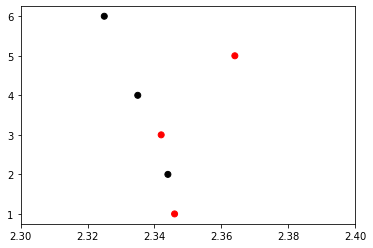

In [69]:
plt.scatter(y,x,color=['r','k','r','k','r','k'])
plt.xlim(2.3,2.4)